NBA 2017 ALL-NBA TEAM predictive model - David Roh

In [1]:
#Importing packages

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import decomposition, cluster,feature_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Import CSV - Note: pre-scrubbed on excel to only filter for awarded players from each season.
df = pd.read_csv(os.path.join('..','Documents', 'ALLNBA_MASTER.csv'), index_col = 'ID')

In [3]:
#let's see the data
df

,lookupkey,Rk,Player,PlayerID,Award_Cat,...,STL,BLK,TOV,PF,PTS
ID,,,,,,,,,,,
1,1516Quincy Acy,1,Quincy Acy,acyqu01,NaN,...,29.0,24.0,27.0,103.0,307.0
2,1516Jordan Adams,2,Jordan Adams,adamsjo01,NaN,...,3.0,0.0,2.0,2.0,7.0
3,1516Steven Adams,3,Steven Adams,adamsst01,NaN,...,42.0,89.0,84.0,223.0,636.0
4,1516Arron Afflalo,4,Arron Afflalo,afflaar01,NaN,...,25.0,10.0,82.0,142.0,909.0
5,1516Alexis Ajinca,5,Alexis Ajinca,ajincal01,NaN,...,19.0,36.0,54.0,134.0,352.0
6,1516Cole Aldrich,6,Cole Aldrich,aldrico01,NaN,...,47.0,68.0,64.0,139.0,328.0
7,1516LaMarcus Aldridge,7,LaMarcus Aldridge,aldrila01,F3,...,38.0,81.0,99.0,151.0,1331.0
8,1516Cliff Alexander,8,Cliff Alexander,alexacl01,NaN,...,1.0,2.0,1.0,1.0,10.0
9,1516Lavoy Allen,9,Lavoy Allen,allenla01,NaN,...,26.0,42.0,69.0,147.0,428.0


In [4]:
#What are we dealing with here?
df.columns

Index([u'lookupkey', u'Rk', u'Player', u'PlayerID', u'Award_Cat', u'Award',
       u'Pos', u'Age', u'Tm', u'G', u'MP', u'PER', u'TS%', u'3PAr', u'FTr',
       u'ORB%', u'DRB%', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%',
       u'OWS', u'DWS', u'WS', u'WS/48', u'OBPM', u'DBPM', u'BPM', u'VORP',
       u'SEASON', u'UID', u'GS', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%',
       u'2P', u'2PA', u'2P%', u'eFG%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB',
       u'TRB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS'],
      dtype='object')

Exploratory Data Analysis

In [5]:
#Null value count
df.isnull().sum().sum()

8548

In [6]:
#Generating various summaries
df.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rk,Award,Age,G,MP,...,STL,BLK,TOV,PF,PTS
count,6375.000000,6375.000000,6375.000000,6375.000000,6375.000000,...,6280.000000,6280.000000,6280.000000,6280.000000,6280.00000
mean,233.899765,0.026510,26.663216,47.556078,1103.164706,...,37.612739,23.616083,69.646019,104.941561,496.16449
std,134.122607,0.160658,4.165767,25.923446,880.334989,...,33.008414,31.393554,60.290175,69.999130,451.62708
min,1.000000,0.000000,19.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000
25%,118.000000,0.000000,23.000000,24.000000,290.500000,...,NaN,NaN,NaN,NaN,NaN
50%,233.000000,0.000000,26.000000,52.000000,918.000000,...,NaN,NaN,NaN,NaN,NaN
75%,351.000000,0.000000,30.000000,72.000000,1797.000000,...,NaN,NaN,NaN,NaN,NaN
max,492.000000,1.000000,44.000000,83.000000,3424.000000,...,217.000000,285.000000,374.000000,332.000000,2832.00000


In [7]:
#What's related to what?
corr=df.corr()

In [8]:
#So what's related to actually getting awarded?
corr.Award.sort_values(axis=0)[-11:]

DWS      0.382350
2PA      0.396989
FG       0.410031
2P       0.420447
PTS      0.427814
FT       0.491072
FTA      0.493141
WS       0.511062
OWS      0.517875
VORP     0.535937
Award    1.000000
Name: Award, dtype: float64

Other than Award column itself, above list indicates top 10 highest correlation shown to Award column

Award_Cat result might be useful, let's check if any null values reside within this column

In [9]:
df.Award_Cat.isnull().sum()

6206

6206 Null values out of 6375 records. Let's understand more, then convert the value

In [10]:
df.Award_Cat.value_counts()

G3    26
F3    22
F2    22
F1    22
G1    22
G2    22
C1    11
C2    11
C3    11
Name: Award_Cat, dtype: int64

Why is G3 show up 26 times, when other G values show up 22 times?

In [11]:
df[df.Award_Cat == 'G3']

,lookupkey,Rk,Player,PlayerID,Award_Cat,...,STL,BLK,TOV,PF,PTS
ID,,,,,,,,,,,
333,1516Kyle Lowry,273,Kyle Lowry,lowryky01,G3,...,158.0,34.0,225.0,211.0,1634.0
517,1516Klay Thompson,425,Klay Thompson,thompkl01,G3,...,60.0,49.0,138.0,152.0,1771.0
862,1415Kyrie Irving,231,Kyrie Irving,irvinky01,G3,...,114.0,20.0,186.0,146.0,1628.0
1160,1415Klay Thompson,442,Klay Thompson,thompkl01,G3,...,87.0,60.0,149.0,122.0,1668.0
1410,1314Goran Dragic,129,Goran Dragic,dragigo01,G3,...,104.0,22.0,213.0,206.0,1542.0
1578,1314Damian Lillard,273,Damian Lillard,lillada01,G3,...,64.0,22.0,193.0,197.0,1695.0
2048,1213James Harden,169,James Harden,hardeja01,G3,...,142.0,38.0,295.0,178.0,2023.0
2375,1213Dwyane Wade,435,Dwyane Wade,wadedw01,G3,...,128.0,56.0,194.0,140.0,1463.0
2830,1112Rajon Rondo,371,Rajon Rondo,rondora01,G3,...,95.0,3.0,193.0,99.0,630.0


Because Allen Iverson was traded, thus the table has multiple lines of records

In [12]:
df.Tm[df.lookupkey == '0506Allen Iverson']

ID
6081    TOT
6082    PHI
6083    DEN
Name: Tm, dtype: object

Subsetting for Test vs. Train

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116aba750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e7c2fd0>]], dtype=object)

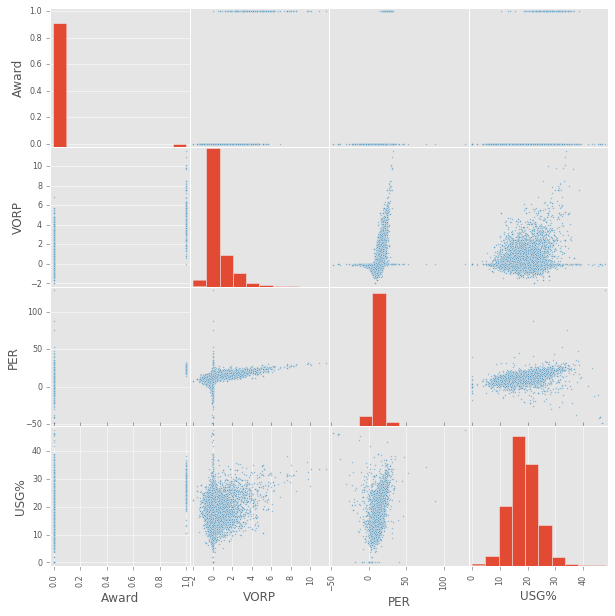

In [13]:
pd.tools.plotting.scatter_matrix(df[['Award','VORP','PER','USG%']], s = 10, figsize = (10, 10))

In [14]:
df2=df.drop('Award_Cat',1) #Since the model has to do with Award column, dropping dup column

In [15]:
df2=df2.dropna()

In [16]:
#Can we check if we are successful?
df2

,lookupkey,Rk,Player,PlayerID,Award,...,STL,BLK,TOV,PF,PTS
ID,,,,,,,,,,,
1,1516Quincy Acy,1,Quincy Acy,acyqu01,0,...,29.0,24.0,27.0,103.0,307.0
2,1516Jordan Adams,2,Jordan Adams,adamsjo01,0,...,3.0,0.0,2.0,2.0,7.0
3,1516Steven Adams,3,Steven Adams,adamsst01,0,...,42.0,89.0,84.0,223.0,636.0
4,1516Arron Afflalo,4,Arron Afflalo,afflaar01,0,...,25.0,10.0,82.0,142.0,909.0
5,1516Alexis Ajinca,5,Alexis Ajinca,ajincal01,0,...,19.0,36.0,54.0,134.0,352.0
6,1516Cole Aldrich,6,Cole Aldrich,aldrico01,0,...,47.0,68.0,64.0,139.0,328.0
7,1516LaMarcus Aldridge,7,LaMarcus Aldridge,aldrila01,1,...,38.0,81.0,99.0,151.0,1331.0
8,1516Cliff Alexander,8,Cliff Alexander,alexacl01,0,...,1.0,2.0,1.0,1.0,10.0
9,1516Lavoy Allen,9,Lavoy Allen,allenla01,0,...,26.0,42.0,69.0,147.0,428.0


In [17]:
#Let's separate the training sample from test sample
train_df = df2.sample(frac=.6, random_state = 0 ).sort_index()
test_df = df2.drop(train_df.index)

Creating Feature Matrix

In [18]:
# Model #1 using top 5
train_c=train_df.Award
train_X=train_df[['VORP','OWS','WS','FTA','FT']]
test_c=test_df.Award
test_X=test_df[['VORP','OWS','WS','FTA','FT']]
model = linear_model.LinearRegression().fit(train_X, train_c)
print 'training Score is', model.score(train_X, train_c)*100, '%'
print 'testing  Score is', model.score(test_X, test_c)*100, '%'

training Score is 33.0323648083 %
testing  Score is 32.6655731269 %


In [19]:
# Model #2 using top 10
train_X=train_df[['VORP','OWS','WS','FTA','FT','DWS','2PA','FG','2P','PTS']]
test_X=test_df[['VORP','OWS','WS','FTA','FT','DWS','2PA','FG','2P','PTS']]
model = linear_model.LinearRegression().fit(train_X, train_c)
print 'training Score is', model.score(train_X, train_c)*100, '%'
print 'testing  Score is', model.score(test_X, test_c)*100, '%'

training Score is 35.6353910271 %
testing  Score is 33.3434670505 %


In [20]:
# Model #3 using top 15
train_X=train_df[['VORP','OWS','WS','FTA','FT','DWS','2PA','FG','2P','PTS','FGA','TOV','DRB','AST','TRB']]
test_X=test_df[['VORP','OWS','WS','FTA','FT','DWS','2PA','FG','2P','PTS','FGA','TOV','DRB','AST','TRB']]
model = linear_model.LinearRegression().fit(train_X, train_c)
print 'training Score is', model.score(train_X, train_c)*100, '%'
print 'testing  Score is', model.score(test_X, test_c)*100, '%'

training Score is 39.6153164083 %
testing  Score is 34.4653938513 %


In [21]:
# Model #4 using top 20
train_X=train_df[['VORP','OWS','WS','FTA','FT','DWS','2PA','FG','2P','PTS','FGA','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%']]
test_X=test_df[['VORP','OWS','WS','FTA','FT','DWS','2PA','FG','2P','PTS','FGA','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%']]
model = linear_model.LinearRegression().fit(train_X, train_c)
print 'training Score is', model.score(train_X, train_c)*100, '%'
print 'testing  Score is', model.score(test_X, test_c)*100, '%'

training Score is 43.5560827021 %
testing  Score is 41.6439041316 %


In [22]:
# Model #5 - I can't be adding more columns! randomly selecting columns: common sense model
train_X=train_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%']]
test_X=test_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%']]
model = linear_model.LinearRegression().fit(train_X, train_c)
print 'training Score is', model.score(train_X, train_c)*100, '%'
print 'testing  Score is', model.score(test_X, test_c)*100, '%'

training Score is 43.6462296031 %
testing  Score is 41.8781563637 %


That was disappointing, the best I can score was still under 50%. Time for feature engineering! - btw, common sense model worked the best!

In [23]:
#First idea - create a relative variable that awards players with higher minutes played as a starter
#Since Playing against the opposite team's starting squad limits statistical production, multiplying the minute ratio
#with factor of 1.5 to award 
# (((minutes played/games)*Games Started)/(Minutes Played))*1.5
df2['StrM'] = (((df.MP/df.G)*df.GS)/df.MP)*1.5

In [24]:
df2

,lookupkey,Rk,Player,PlayerID,Award,...,BLK,TOV,PF,PTS,StrM
ID,,,,,,,,,,,
1,1516Quincy Acy,1,Quincy Acy,acyqu01,0,...,24.0,27.0,103.0,307.0,0.737288
2,1516Jordan Adams,2,Jordan Adams,adamsjo01,0,...,0.0,2.0,2.0,7.0,0.000000
3,1516Steven Adams,3,Steven Adams,adamsst01,0,...,89.0,84.0,223.0,636.0,1.500000
4,1516Arron Afflalo,4,Arron Afflalo,afflaar01,0,...,10.0,82.0,142.0,909.0,1.204225
5,1516Alexis Ajinca,5,Alexis Ajinca,ajincal01,0,...,36.0,54.0,134.0,352.0,0.432203
6,1516Cole Aldrich,6,Cole Aldrich,aldrico01,0,...,68.0,64.0,139.0,328.0,0.125000
7,1516LaMarcus Aldridge,7,LaMarcus Aldridge,aldrila01,1,...,81.0,99.0,151.0,1331.0,1.500000
8,1516Cliff Alexander,8,Cliff Alexander,alexacl01,0,...,2.0,1.0,1.0,10.0,0.000000
9,1516Lavoy Allen,9,Lavoy Allen,allenla01,0,...,42.0,69.0,147.0,428.0,0.531646


In [25]:
#Again, separating. remember DON'T TOUCH!
train_df = df2.sample(frac=.6, random_state = 0 ).sort_index()
test_df = df2.drop(train_df.index)

In [26]:
# Model #6 - Adding created variable
train_X=train_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%','StrM']]
test_X=test_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%','StrM']]
model = linear_model.LinearRegression().fit(train_X, train_c)
print 'training Score is', model.score(train_X, train_c)*100, '%'
print 'testing  Score is', model.score(test_X, test_c)*100, '%'

training Score is 43.7078740351 %
testing  Score is 41.7117406262 %


It barely changed much. I think it's time to move away from simple regression model to Logistic regression

Log Reg

In [33]:
# Log_Model #1
train_c=train_df.Award
train_X=train_df[['VORP','OWS','WS','FTA','FT']]
test_c=test_df.Award
test_X=test_df[['VORP','OWS','WS','FTA','FT']]
Lmodel1 = linear_model.LogisticRegression().fit(train_X, train_c)
print 'training Score is', Lmodel1.score(train_X, train_c)*100, '%'
print 'testing  Score is', Lmodel1.score(test_X, test_c)*100, '%'

 training Score is 98.3728994399 %
testing  Score is 98.32 %


In [35]:
c_hat1 = Lmodel1.predict(train_X)

pd.crosstab(c_hat1,
    train_c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,3629,43
1,18,59


In [36]:
# Log_Model #2
train_X=train_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%','StrM']]
test_X=test_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%','StrM']]
Lmodel2 = linear_model.LogisticRegression().fit(train_X, train_c)
print 'training Score is', Lmodel2.score(train_X, train_c)*100, '%'
print 'testing  Score is', Lmodel2.score(test_X, test_c)*100, '%'

training Score is 98.7996799146 %
testing  Score is 98.48 %


In [38]:
c_hat2 = Lmodel2.predict(train_X)

pd.crosstab(c_hat2,
    train_c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,3631,29
1,16,73


In [39]:
# Log_Model #3 AKA common sense model
train_X=train_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%']]
test_X=test_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%']]
Lmodel3 = linear_model.LogisticRegression().fit(train_X, train_c)
print 'training Score is', Lmodel3.score(train_X, train_c)*100, '%'
print 'testing  Score is', Lmodel3.score(test_X, test_c)*100, '%'

training Score is 98.773006135 %
testing  Score is 98.48 %


In [41]:
c_hat3 = Lmodel3.predict(train_X)

pd.crosstab(c_hat3,
    train_c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

    

True Class,0,1
Hypothesized Class,,
0,3631,30
1,16,72


Drumroll please....... Model 2 it is. Let's see what we get with current dataset!

Getting the current data

In [71]:
Predict_df = pd.read_csv(os.path.join('..','Documents', 'Current_NBA_Adv.csv'), index_col = 'Rk')

In [72]:
#Let's see what we got here
Predict_df

,Season,LookupKey,Player,PlayerID,Pos,...,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,
1,1617,1617Alex Abrines,Alex Abrines,abrinal01,SG,...,21,5,23,70,248
2,1617,1617Quincy Acy,Quincy Acy,acyqu01,PF,...,3,7,7,25,91
2,1617,1617Quincy Acy,Quincy Acy,acyqu01,PF,...,3,7,7,25,91
2,1617,1617Quincy Acy,Quincy Acy,acyqu01,PF,...,3,7,7,25,91
3,1617,1617Steven Adams,Steven Adams,adamsst01,C,...,60,60,109,131,672
4,1617,1617Arron Afflalo,Arron Afflalo,afflaar01,SG,...,18,6,33,87,383
5,1617,1617Alexis Ajinca,Alexis Ajinca,ajincal01,C,...,12,17,21,44,107
6,1617,1617Cole Aldrich,Cole Aldrich,aldrico01,C,...,23,21,13,80,92
7,1617,1617LaMarcus Aldridge,LaMarcus Aldridge,aldrila01,PF,...,30,58,74,121,893


In [73]:
Predict_df['StrM'] = (((Predict_df.MP/Predict_df.G)*Predict_df.GS)/Predict_df.MP)*1.5
Predict_df = Predict_df.dropna()
Predict_X=Predict_df[['VORP','WS','FTA','FT','FG','PTS','TOV','DRB','AST','TRB','GS','PER','MP','STL','USG%','TS%','eFG%','StrM']]
Predict_df['Pr_Award']= Lmodel2.predict(Predict_X)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [74]:
Predict_df.Player[Predict_df.Pr_Award==1]

Rk
16     Giannis Antetokounmpo
115             Kevin Durant
165             James Harden
210             LeBron James
342            Mason Plumlee
403            Isaiah Thomas
435        Russell Westbrook
Name: Player, dtype: object